In [1]:
# !pip install interpret
# !pip install --user xgboost
# !pip install pytorch-tabnet
# !pip install anchor-exp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from interpret import preserve, show
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

random_state=42

In [3]:
dataset_folder = 'dataset/HGSORF_CSection/'

In [4]:
df=pd.read_csv(dataset_folder + 'train_COMBO.csv')
df.replace(to_replace=' ',value=np.nan,inplace=True)
#df.drop(columns=['Unnamed: 0'],inplace=True)
df1=pd.read_csv(dataset_folder + 'test_COMBO.csv')
df1.replace(to_replace=' ',value=np.nan,inplace=True)
#df1.drop(columns=['Unnamed: 0'],inplace=True)
x_train=df.drop(columns=['Last_Birth_a_Caesarean_Section'])
y_train=df['Last_Birth_a_Caesarean_Section']
x_test=df1.drop(columns=['Last_Birth_a_Caesarean_Section'])
y_test=df1['Last_Birth_a_Caesarean_Section']

In [5]:
df_main=pd.concat([df,df1],axis=0)
df_main

Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
0                27                           1                  1   
1                32                           2                  0   
2                37                           1                  2   
3                29                           2                  1   
4                31                           2                  0   
...             ...                         ...                ...   
7881             27                           2                  0   
7882             21                           1                  2   
7883             35                           2                  0   
7884             24                           1                  1   
7885             27                           1                  1   

      Number_of_household_members_  Total_children_ever_born  \
0                               10                         2   
1                                8                         6   
2                                7                         5   
3                               14                         6   
4                                5                         3   
...                            ...                       ...   
7881                            24                         6   
7882                             4                         1   
7883                             8                         7   
7884                            17                         1   
7885                            12                         8   

      Births_in_last_five_years  Number_of_living_children  \
0                             2                          2   
1                             2                          4   
2                             1                          5   
3                             2                          3   
4                             3                          3   
...                         ...                        ...   
7881                          2                          5   
7882                          1                          1   
7883                          1                          6   
7884                          1                          1   
7885                          2                          8   

      Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
0                                   1                          0   
1                                   0                          1   
2                                   0                          1   
3                                   0                          1   
4                                   0                          0   
...                               ...                        ...   
7881                                0                          0   
7882                                0                          1   
7883                                0                          1   
7884                                0                          1   
7885                                1                          1   

      Household_Toilet_Facility  ...  Smoker  Husbands_Education  \
0                             0  ...       0                   2   
1                             0  ...       0                   1   
2                             1  ...       0                   2   
3                             1  ...       0                   0   
4                             0  ...       0                   2   
...                         ...  ...     ...                 ...   
7881                          1  ...       0                   2   
7882                          1  ...       0                   2   
7883                          0  ...       0                   2   
7884                          1  ...       0                   2   
7885                          1  ...       0                   2   

      Husbands_Oc

In [6]:
x=df_main.drop(columns=['Last_Birth_a_Caesarean_Section'])
y=df_main['Last_Birth_a_Caesarean_Section']

In [7]:
df

Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
0                 27                           1                  1   
1                 32                           2                  0   
2                 37                           1                  2   
3                 29                           2                  1   
4                 31                           2                  0   
...              ...                         ...                ...   
18393             30                           1                  3   
18394             30                           2                  0   
18395             24                           1                  2   
18396             23                           2                  0   
18397             28                           2                  0   

       Number_of_household_members_  Total_children_ever_born  \
0                                10                         2   
1                                 8                         6   
2                                 7                         5   
3                                14                         6   
4                                 5                         3   
...                             ...                       ...   
18393                             5                         4   
18394                             8                         4   
18395                            11                         2   
18396                            13                         4   
18397                             8                         4   

       Births_in_last_five_years  Number_of_living_children  \
0                              2                          2   
1                              2                          4   
2                              1                          5   
3                              2                          3   
4                              3                          3   
...                          ...                        ...   
18393                          2                          4   
18394                          2                          4   
18395                          2                          2   
18396                          3                          3   
18397                          1                          4   

       Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
0                                    1                          0   
1                                    0                          1   
2                                    0                          1   
3                                    0                          1   
4                                    0                          0   
...                                ...                        ...   
18393                                1                          1   
18394                                0                          1   
18395                                0                          1   
18396                                0                          1   
18397                                1                          1   

       Household_Toilet_Facility  ...  Smoker  Husbands_Education  \
0                              0  ...       0                   2   
1                              0  ...       0                   1   
2                              1  ...       0                   2   
3                              1  ...       0                   0   
4                              0  ...       0                   2   
...                          ...  ...     ...                 ...   
18393                          1  ...       0                   3   
18394                          1  ...       0                   0   
18395                          1  ...       0                   3   
18396                          0  ...       0                   0   
18397                       

In [8]:
df1

Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
0                32                           1                  2   
1                28                           1                  0   
2                24                           2                  0   
3                33                           1                  0   
4                24                           2                  1   
...             ...                         ...                ...   
7881             27                           2                  0   
7882             21                           1                  2   
7883             35                           2                  0   
7884             24                           1                  1   
7885             27                           1                  1   

      Number_of_household_members_  Total_children_ever_born  \
0                               14                         3   
1                               18                         6   
2                                4                         3   
3                               24                         5   
4                               10                         2   
...                            ...                       ...   
7881                            24                         6   
7882                             4                         1   
7883                             8                         7   
7884                            17                         1   
7885                            12                         8   

      Births_in_last_five_years  Number_of_living_children  \
0                             2                          3   
1                             2                          6   
2                             2                          2   
3                             1                          5   
4                             1                          2   
...                         ...                        ...   
7881                          2                          5   
7882                          1                          1   
7883                          1                          6   
7884                          1                          1   
7885                          2                          8   

      Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
0                                   0                          0   
1                                   0                          1   
2                                   0                          1   
3                                   0                          1   
4                                   0                          1   
...                               ...                        ...   
7881                                0                          0   
7882                                0                          1   
7883                                0                          1   
7884                                0                          1   
7885                                1                          1   

      Household_Toilet_Facility  ...  Smoker  Husbands_Education  \
0                             0  ...       0                   2   
1                             1  ...       0                   1   
2                             1  ...       0                   2   
3                             1  ...       0                   2   
4                             1  ...       0                   0   
...                         ...  ...     ...                 ...   
7881                          1  ...       0                   2   
7882                          1  ...       0                   2   
7883                          0  ...       0                   2   
7884                          1  ...       0                   2   
7885                          1  ...       0                   2   

      Husbands_Oc

In [9]:
x_test.shape

(7886, 24)

In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age_of_Mother                            18398 non-null  int64  
 1   Type_of_place_of_residence               18398 non-null  int64  
 2   Mothers_Education                        18398 non-null  int64  
 3   Number_of_household_members_             18398 non-null  int64  
 4   Total_children_ever_born                 18398 non-null  int64  
 5   Births_in_last_five_years                18398 non-null  int64  
 6   Number_of_living_children                18398 non-null  int64  
 7   Ever_had_a_terminated_pregnancy          18398 non-null  int64  
 8   Sources_of_Drinking_Water                18398 non-null  int64  
 9   Household_Toilet_Facility                18398 non-null  int64  
 10  Reading_Newspaper_or_Magazine            18398

# ML Model

In [11]:
import sklearn.metrics
import pandas as pd
import time
import numpy as np

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from interpret.glassbox import ExplainableBoostingClassifier
from pytorch_tabnet.tab_model import TabNetClassifier

In [13]:
random_state=42

In [14]:
x_train

Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
0                 27                           1                  1   
1                 32                           2                  0   
2                 37                           1                  2   
3                 29                           2                  1   
4                 31                           2                  0   
...              ...                         ...                ...   
18393             30                           1                  3   
18394             30                           2                  0   
18395             24                           1                  2   
18396             23                           2                  0   
18397             28                           2                  0   

       Number_of_household_members_  Total_children_ever_born  \
0                                10                         2   
1                                 8                         6   
2                                 7                         5   
3                                14                         6   
4                                 5                         3   
...                             ...                       ...   
18393                             5                         4   
18394                             8                         4   
18395                            11                         2   
18396                            13                         4   
18397                             8                         4   

       Births_in_last_five_years  Number_of_living_children  \
0                              2                          2   
1                              2                          4   
2                              1                          5   
3                              2                          3   
4                              3                          3   
...                          ...                        ...   
18393                          2                          4   
18394                          2                          4   
18395                          2                          2   
18396                          3                          3   
18397                          1                          4   

       Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
0                                    1                          0   
1                                    0                          1   
2                                    0                          1   
3                                    0                          1   
4                                    0                          0   
...                                ...                        ...   
18393                                1                          1   
18394                                0                          1   
18395                                0                          1   
18396                                0                          1   
18397                                1                          1   

       Household_Toilet_Facility  ...  Mothers_BMI  Smoker  \
0                              0  ...    27.650000       0   
1                              0  ...    25.450000       0   
2                              1  ...    31.023793       0   
3                              1  ...    20.548000       0   
4                              0  ...    23.000000       0   
...                          ...  ...          ...     ...   
18393                          1  ...    29.116000       0   
18394                          1  ...    22.678000       0   
18395                          1  ...    23.626742       0   
18396                          0  ...    22.150000       0   
18397                          1  ...    23.520000       0   

       Husbands_Education  Husbands_Occupa

In [15]:
def classify_report(clfs, dataset):
    x_train, y_train, x_test, y_test = dataset
    data = []
    for clf, name, no_df in clfs:
        if no_df:
            x_tr, x_te = x_train, x_test
        else:
            x_tr, x_te = x_train.values,  x_test.values
        clf.fit(x_tr, y_train)
        pred = clf.predict(x_te)
        f1, acc = sklearn.metrics.f1_score(y_test, pred, average='binary'), sklearn.metrics.accuracy_score(y_test, pred)
        data.append([name, f1, acc])
    df = pd.DataFrame(data, columns = ['Name', 'F1', 'Acc.'])
    df = df.sort_values(by=['F1'])
    return df

In [16]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=random_state)
gbc = GradientBoostingClassifier(random_state=random_state)
_xgb = xgb.XGBClassifier(random_state=random_state)
ebm = ExplainableBoostingClassifier(random_state=random_state)
tbn = TabNetClassifier(verbose=0, seed=random_state)

clfs = [(rf, 'rf', True), (gbc, 'gbc', True), (_xgb, 'xgb', True), (ebm, 'ebm', True), (tbn, 'tbn', False)]
# clfs = [(rf, 'rf', True), (ebm, 'ebm', True), (tbn, 'tbn', False)]
dataset = x_train, y_train, x_test, y_test
classify_report(clfs, dataset)

Name        F1      Acc.
1  gbc  0.927626  0.932031
4  tbn  0.950952  0.950672
3  ebm  0.953862  0.954857
2  xgb  0.981586  0.981740
0   rf  0.984698  0.984910

# XAI

In [17]:
# selected_model = _xgb
# For fairness of comparisions we used RF
selected_model = rf

In [18]:
class_names = ['NO','YES']
feature_names = x_train.columns.to_list()
# local = lime, shap, anchor, tabnet, ebm
# global = pfi, tabnet, ebm, shap
# methods = pfi, tabnet, ebm, shap, lime, anchor
# remaining = pdp, eli5, ice, adawhip, break down

## Noisy test

In [19]:
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

x_test_noisy = add_noise(x_test)
display(x_test_noisy)

Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
0         32.014765                    0.975533           2.015682   
1         27.996352                    0.985333          -0.004838   
2         23.990532                    1.988331          -0.007614   
3         32.989876                    0.986390           0.004813   
4         24.004268                    1.999355           0.997651   
...             ...                         ...                ...   
7881      26.981192                    2.002562          -0.005156   
7882      21.001652                    0.995586           2.018126   
7883      34.995334                    2.007958           0.006553   
7884      24.010563                    1.004110           0.989296   
7885      26.985942                    0.999986           1.005044   

      Number_of_household_members_  Total_children_ever_born  \
0                        14.004393                  3.005716   
1                        18.006437                  6.006073   
2                         4.013620                  3.004455   
3                        23.980036                  4.987496   
4                        10.000609                  1.984013   
...                            ...                       ...   
7881                     23.995906                  5.989212   
7882                      3.987380                  1.003626   
7883                      7.987660                  7.010769   
7884                     16.988598                  0.989885   
7885                     11.994636                  8.002301   

      Births_in_last_five_years  Number_of_living_children  \
0                      2.005131                   3.009494   
1                      2.016791                   6.005950   
2                      2.004191                   1.984273   
3                      0.985806                   5.003782   
4                      0.988385                   1.996763   
...                         ...                        ...   
7881                   2.012079                   5.003845   
7882                   0.996102                   1.005172   
7883                   0.997033                   5.991133   
7884                   1.006060                   1.009397   
7885                   1.985887                   8.010354   

      Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
0                            0.006137                  -0.001285   
1                            0.010843                   0.998379   
2                            0.000408                   0.997268   
3                            0.009389                   1.005591   
4                           -0.006318                   0.995820   
...                               ...                        ...   
7881                        -0.004532                  -0.000822   
7882                         0.013218                   1.007317   
7883                         0.002378                   0.995653   
7884                         0.008685                   0.997167   
7885                         0.988092                   0.999922   

      Household_Toilet_Facility  ...  Mothers_BMI    Smoker  \
0                      0.012424  ...    28.143565  0.021755   
1                      0.990532  ...    31.592743  0.002169   
2                      1.006807  ...    22.116376 -0.023663   
3                      0.987085  ...    20.419834  0.014481   
4                      0.998645  ...    27.666693  0.002636   
...                         ...  ...          ...       ...   
7881                   0.987457  ...    32.301448 -0.003383   
7882                   0.999306  ...    26.112792  0.006241   
7883                  -0.000352  ...    23.020842 -0.014845   
7884                   0.985740  ...    26.383421 -0.008111   
7885                   0.979375  ...    24.153266 -0.008258   

      Husbands_Education  Husbands_Occupations  Mothers_Occupation  \
0      

## Local

In [20]:
import lime
from lime import lime_tabular
exp_lime=lime_tabular.LimeTabularExplainer(np.array(x_train),feature_names=x_train.columns,class_names=['NO','YES'],mode='classification')

import shap
shap.plots.initjs()

exp_shap = shap.TreeExplainer(selected_model)

from anchor import anchor_tabular

exp_anchor = anchor_tabular.AnchorTabularExplainer(
    class_names,
    feature_names,
    x_train.values[:,:],
    {})

def get_tbn_local_graph(exp_tn_mat, idx, feature_names):
    m = exp_tn_mat[idx]>0
    ax = pd.Series(exp_tn_mat[idx][m], index=np.array(feature_names)[m]).sort_values(ascending=True).plot.barh()
    ax.set_title("TabNet Feature Importance")
    ax.figure.tight_layout()
    plt.show()

def show_outputs(dataset, _id):
    exp_lime.explain_instance(dataset.iloc[_id,:], selected_model.predict_proba).show_in_notebook(show_all=True)
    shap.plots.waterfall(exp_shap(dataset.iloc[_id:_id+1])[0,:,_prediction], max_display=10)
    preserve(ebm.explain_local(dataset.iloc[_id:_id+1], y_test.iloc[_id:_id+1], name='EBM'), 0)
    get_tbn_local_graph(tbn.explain(dataset.iloc[_id:_id+1].values)[0], 0, feature_names)
    
    exp = exp_anchor.explain_instance(dataset.iloc[_id, :].values, selected_model.predict, threshold=0.99)
    print('  >> Anchor: %s' % (' AND '.join(exp.names())))

In [21]:
def show_data_using_ids(ids_to_explain_list):
    print('Original')
    display(x_test.iloc[ids_to_explain_list])
    print('Noisy')
    display(x_test_noisy.iloc[ids_to_explain_list])
    print('Predictions')
    display(y_test.iloc[ids_to_explain_list])

In [22]:
ids_to_explain_list = [554, 555]

Original


Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
554             22                           2                  0   
555             40                           2                  0   

     Number_of_household_members_  Total_children_ever_born  \
554                             8                         1   
555                             8                         7   

     Births_in_last_five_years  Number_of_living_children  \
554                          1                          1   
555                          1                          7   

     Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
554                                0                          1   
555                                0                          1   

     Household_Toilet_Facility  ...  Mothers_BMI  Smoker  Husbands_Education  \
554                          1  ...    17.744991       0                   0   
555                          0  ...    19.890000       0                   0   

     Husbands_Occupations  Mothers_Occupation  \
554                     4                   0   
555                     1                   1   

     Decision_Making_Power_on_Delivery_Palce  Suffered_by_Domestic_Violence  \
554                                        2                              1   
555                                        2                              0   

     Number_of_ANC_Visits  Had_Previous_C-section  Size_of_child_at_birth  
554                     3                       1                       3  
555                     0                       0                       3  

[2 rows x 24 columns]

Noisy


Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
554      21.990243                    2.006925          -0.015571   
555      39.999199                    2.009447          -0.019474   

     Number_of_household_members_  Total_children_ever_born  \
554                      8.000888                  0.999213   
555                      7.995919                  7.014549   

     Births_in_last_five_years  Number_of_living_children  \
554                   1.005798                   0.981467   
555                   0.993384                   7.002294   

     Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
554                         0.001169                   0.995192   
555                         0.027085                   0.992996   

     Household_Toilet_Facility  ...  Mothers_BMI    Smoker  \
554                   0.996829  ...    17.772108 -0.008010   
555                   0.005267  ...    19.908649 -0.006774   

     Husbands_Education  Husbands_Occupations  Mothers_Occupation  \
554           -0.002220              4.005295           -0.006742   
555            0.000772              0.988716            1.011081   

     Decision_Making_Power_on_Delivery_Palce  Suffered_by_Domestic_Violence  \
554                                 2.004941                       0.996900   
555                                 2.000507                       0.004762   

     Number_of_ANC_Visits  Had_Previous_C-section  Size_of_child_at_birth  
554              3.016147                0.986296                3.009494  
555             -0.004184               -0.007841                2.993264  

[2 rows x 24 columns]

Predictions


554    1
555    0
Name: Last_Birth_a_Caesarean_Section, dtype: int64

ID 554 Prediction:  1
> Original


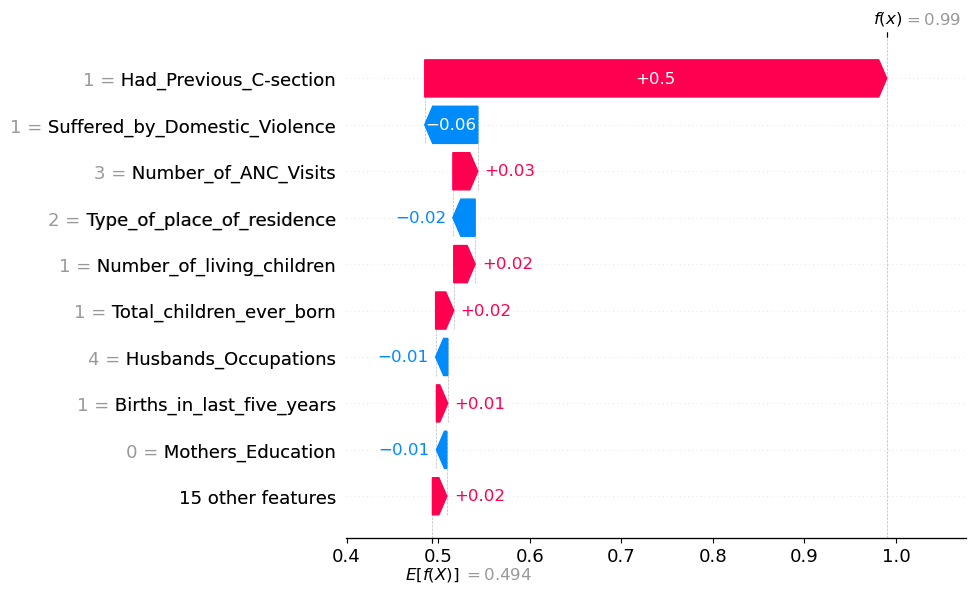

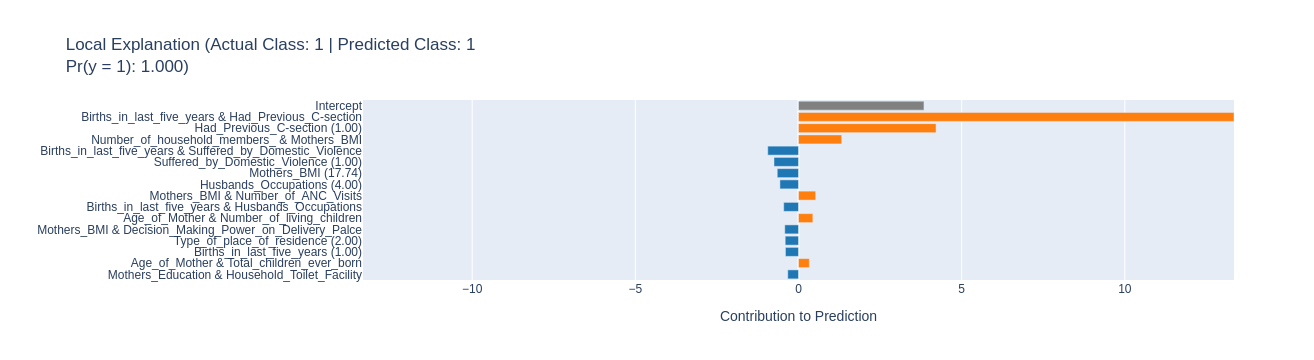

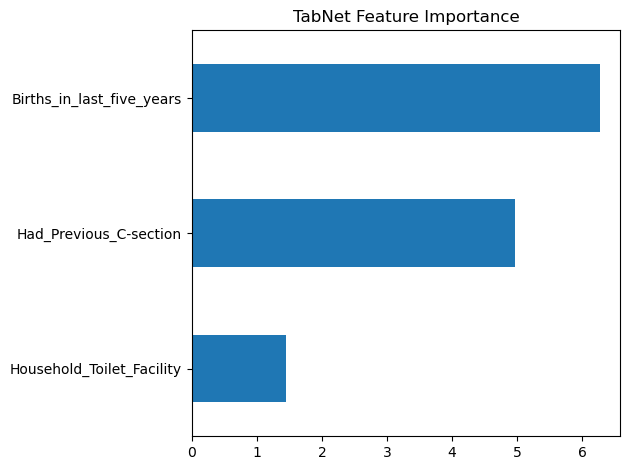

  >> Anchor: Had_Previous_C-section > 0.00
> Noisy


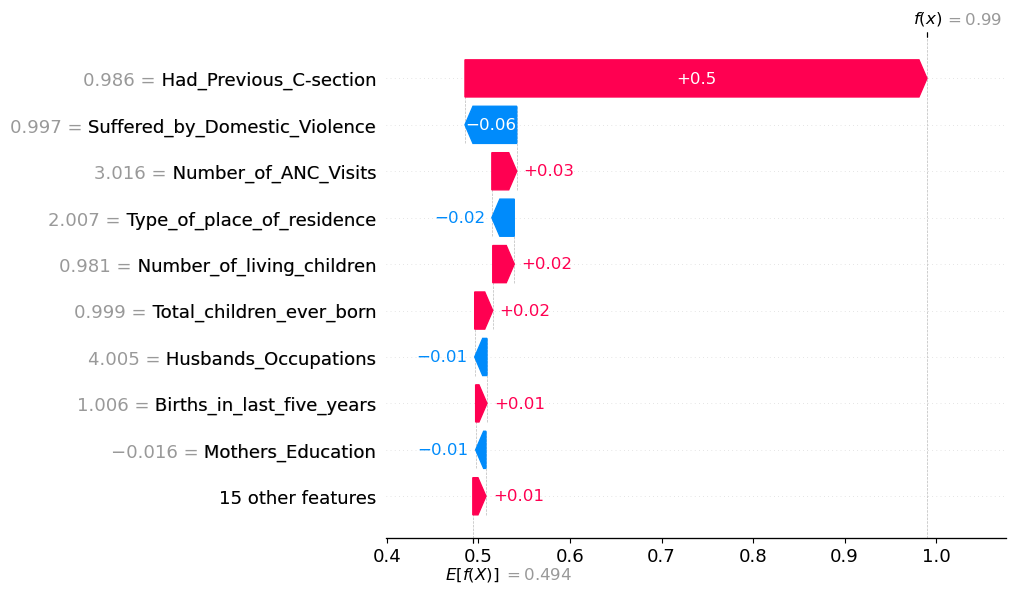

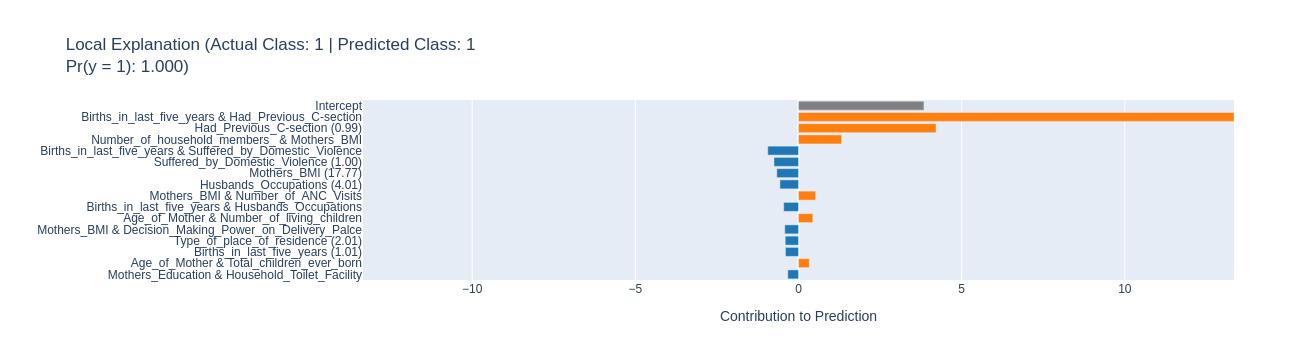

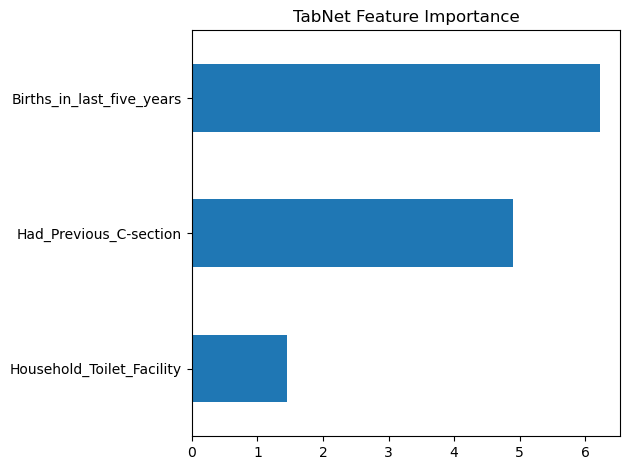

  >> Anchor: Had_Previous_C-section > 0.00
ID 555 Prediction:  0
> Original


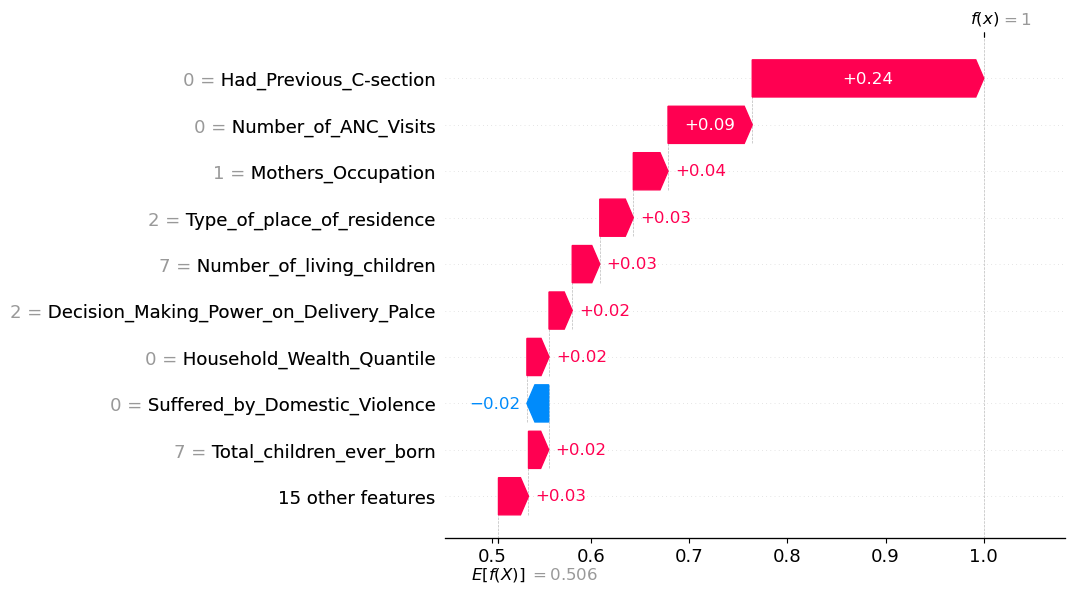

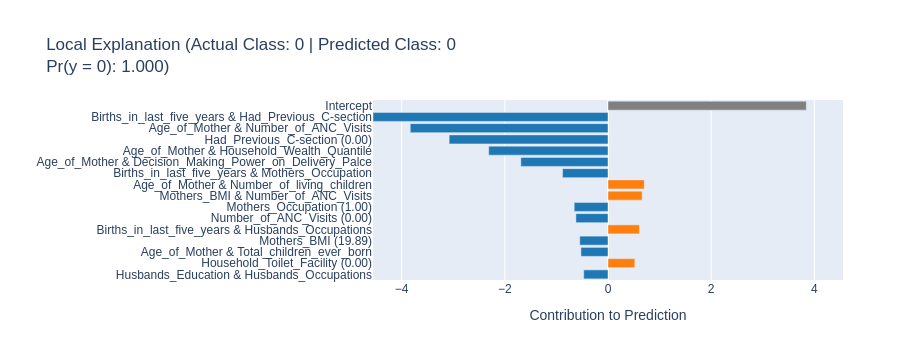

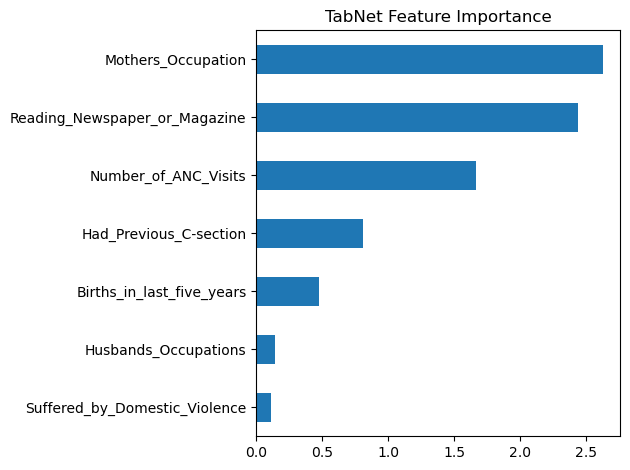

  >> Anchor: Had_Previous_C-section <= 0.00 AND Mothers_Occupation > 0.00 AND Number_of_ANC_Visits <= 1.00 AND Number_of_living_children > 4.00
> Noisy


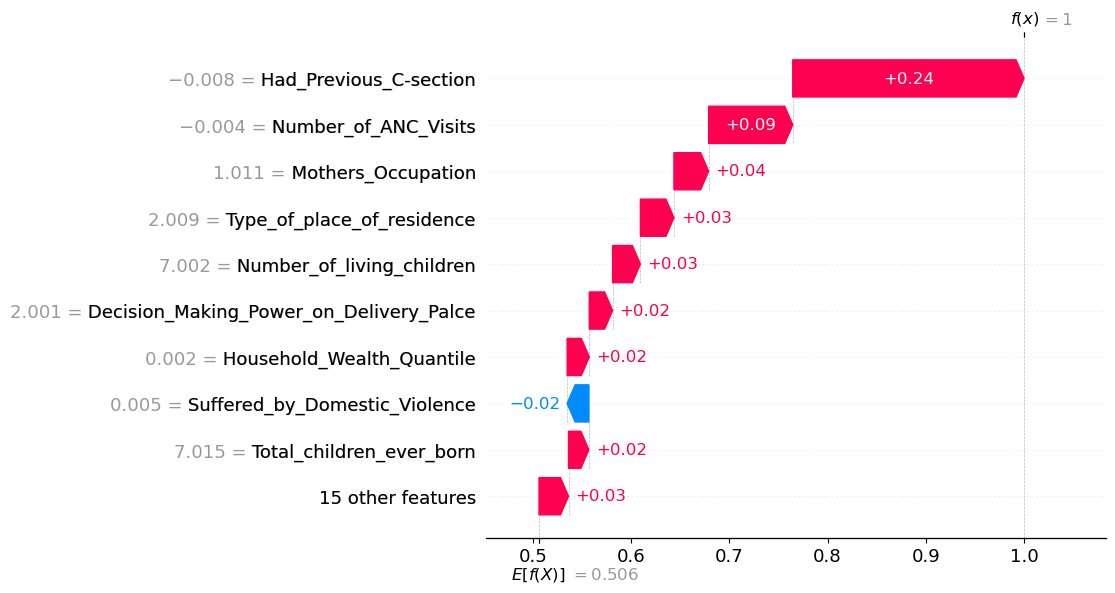

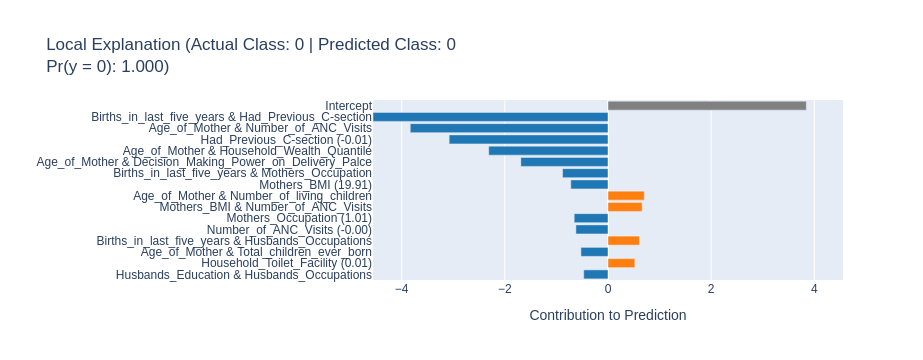

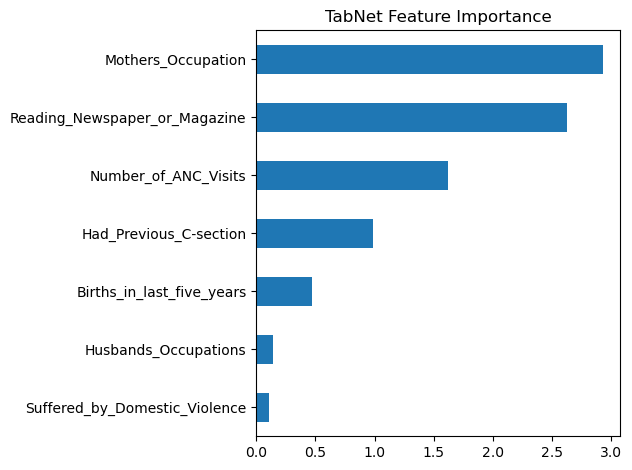

  >> Anchor: Had_Previous_C-section <= 0.00 AND Suffered_by_Domestic_Violence > 0.00 AND Births_in_last_five_years <= 1.00


In [23]:
np.random.seed(random_state)
show_data_using_ids(ids_to_explain_list)
for _id in ids_to_explain_list:
    _prediction = y_test.iloc[_id]
    print('ID', _id,  'Prediction: ', _prediction)

    # Original explanation cases
    # Noisy explanation to compare how the rule (features in the rule) changes due to insertion of Noise
    for msg, dataset in [('Original', x_test), ('Noisy', x_test_noisy)]:
        print('>', msg)
        show_outputs(dataset, _id)

## Global

### PMI

Elapsed time to compute the importances: 2.317 seconds


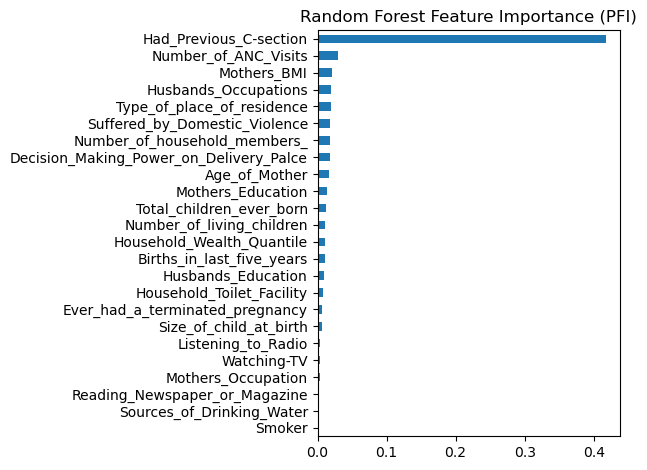

In [24]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    selected_model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

selected_model_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True)

ax = selected_model_importances.plot.barh()
ax.set_title("Random Forest Feature Importance (PFI)")
ax.figure.tight_layout()

### TABNET

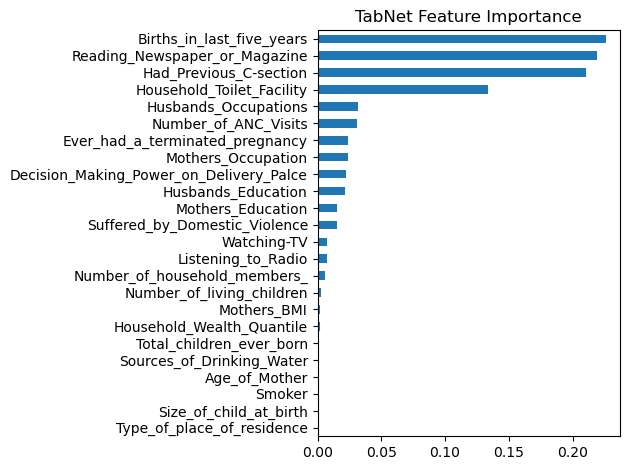

In [25]:
ax = pd.Series(tbn.feature_importances_, index=feature_names).sort_values(ascending=True).plot.barh()
ax.set_title("TabNet Feature Importance")
ax.figure.tight_layout()

### EBM

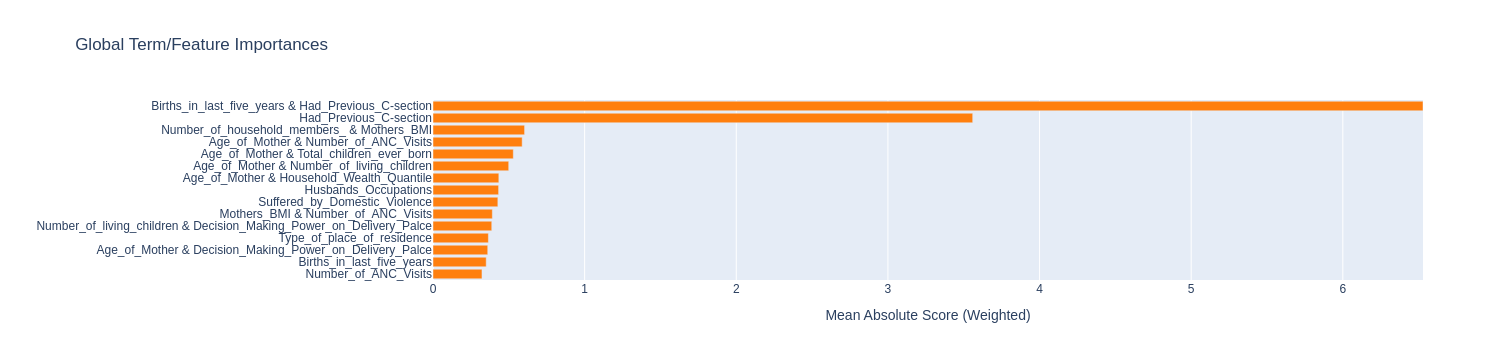

In [26]:
ebm_global = ebm.explain_global()
# show(ebm_global)

# Replace show with the preserve.

# ebm_global = ebm.explain_global(name='EBM')
# show(ebm_global)

# preserve(ebm_global, file_name='output/global-graph.html')
preserve(ebm_global)

### SHAP

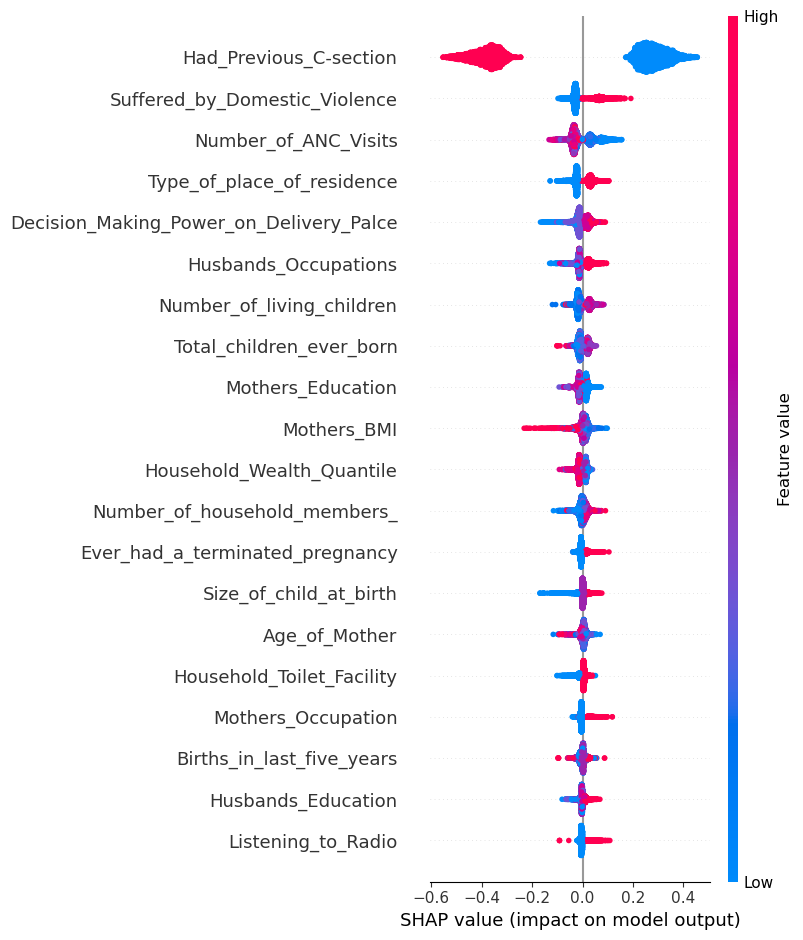

In [27]:
shap_values = exp_shap.shap_values(x_test)
shap.summary_plot(shap_values[:,:,0], x_test)
# shap.summary_plot(shap_values[:,:,0], X_test)

In [28]:
# f.savefig("summary_plot_CS.png", bbox_inches='tight', dpi=600)